# Исследование объявлений о продаже квартир

Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


## Изучение данных из файла

In [1]:
#импорт библиотеки и чтение файла с сохранением в df
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')

display( df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
# общая информация  о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

<div class="alert alert-info">При первичном анализе видны несоответствующие содержимому  в столбцах типы данных, а именно:
    
    1  общее кол-во этажей -вещественное число вместо целочисленного типа
    
    2 апартамент -объект вместо булева типа( апартамент-не апартамент)
    
    3 балконы-вещественное число вместо целочисленного
    
    4 объекты рядом( столбцы число  парков, водоемов)
    

## Предобработка данных

In [3]:
# подсчет пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#Заполнение пропусков в колонке balcony на 0
df['balcony']=df['balcony'].fillna(value=0)
display(df['balcony'])

0        0.0
1        2.0
2        0.0
3        0.0
4        0.0
        ... 
23694    0.0
23695    0.0
23696    0.0
23697    2.0
23698    0.0
Name: balcony, Length: 23699, dtype: float64

In [5]:
# замена вещественного типа данных в столбце balcony  на целочисленный
df['balcony']=df['balcony'].astype('int')
display(df['balcony'])

0        0
1        2
2        0
3        0
4        0
        ..
23694    0
23695    0
23696    0
23697    2
23698    0
Name: balcony, Length: 23699, dtype: int64

<div class="alert alert-info"> Пропуски в колонке балконы,наверное там ,где балконы отсутствуют, поэтому меняем на ноль, и заменяем тип данных на целочисленный

In [6]:
# заполняем пропуски ceiling_height медианным значением по столбцу
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,38.0,4,NaN,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,29.7,1,NaN,...,NaN,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<div class="alert alert-info">Пропуски в столбце о высоте потолков логично заменить медианой, т.к. в типичных проектах при разной площади квартир и кол-ве комнат высота потолков одинакова  

In [7]:
df['is_apartment'].value_counts()




False    2725
True       50
Name: is_apartment, dtype: int64

In [8]:
df['is_apartment']=df['is_apartment'].fillna(0)
df['is_apartment'].describe()



count     23699
unique        2
top           0
freq      23649
Name: is_apartment, dtype: int64

In [9]:
df['is_apartment']=df['is_apartment'].astype('bool')
display(df['is_apartment'])

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, Length: 23699, dtype: bool

<div class="alert alert-info">пропуски в колонке аппартамент значат скорее что это не апартаменты , поэтому меняю сначала на 0 , а затем на булев тип( если сразу на булев, то слишком много аппартаментов))

In [10]:
#Заполнение пропусков в колонке kitchen_area на 0
df['kitchen_area']=df['kitchen_area'].fillna(value=0)
display(df['kitchen_area'])

0        25.00
1        11.00
2         8.30
3         0.00
4        41.00
         ...  
23694    13.83
23695     8.50
23696     0.00
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

<div class="alert alert-info">Кодом ниже пытаюсь заменить пропуски на медианы по кол-ву комнат объединением таблиц. Здесь вроде работает, но при дальнейших действиях в строках ниже опять происходит сбой на NAN(( Почему?

```python

    df["living_area"] = df.groupby("rooms").transform(lambda x: x.fillna(x.median()))
    
```

In [11]:
df['rooms'].value_counts()


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [12]:
df_new=df.pivot_table( index='rooms', values='living_area',aggfunc='median')
display(df_new)

,living_area
rooms,
0,18.000
1,17.600
2,30.500
3,45.000
4,63.600
5,91.785
6,123.900
7,145.000
8,161.000


In [13]:
df.merge( df_new,on='living_area', how='inner')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.0,7,False,...,6.0,0,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
1,9,4350000.0,37.0,2018-02-22T00:00:00,1,2.65,19.0,18.0,6,False,...,10.7,0,Санкт-Петербург,34324.0,14192.0,0.0,NaN,0.0,NaN,45.0
2,16,3800000.0,38.6,2018-02-22T00:00:00,1,2.65,9.0,18.0,6,False,...,8.4,2,Санкт-Петербург,36450.0,13364.0,0.0,NaN,0.0,NaN,8.0
3,7,3700000.0,33.0,2016-04-15T00:00:00,1,2.65,14.0,18.0,2,False,...,6.2,1,Санкт-Петербург,49214.0,16140.0,0.0,NaN,0.0,NaN,88.0
4,4,4590000.0,40.0,2017-05-29T00:00:00,1,2.65,6.0,18.0,1,False,...,10.0,0,Санкт-Петербург,20062.0,6175.0,1.0,241.0,0.0,NaN,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,10,23500000.0,313.0,2017-02-13T00:00:00,9,3.20,6.0,179.2,5,False,...,13.2,0,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN
1208,6,32250000.0,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,False,...,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
1209,4,15500000.0,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,False,...,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
1210,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [14]:
df["living_area"] = df.groupby("rooms").transform(lambda x: x.fillna(x.median()))
display(df)

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,20,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,7,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,10,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,0.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,9,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,14,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,18,1,False,...,0.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,13,12,False,...,23.30,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [15]:
#Заполнение пропусков в колонке days_exposition на 0
df['days_exposition']=df['days_exposition'].fillna(value=0)
display(df['days_exposition'])

0          0.0
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      0.0
23695     45.0
23696      0.0
23697    602.0
23698      0.0
Name: days_exposition, Length: 23699, dtype: float64

In [16]:
# замена вещественного типа данных в столбце days_exposition  на целочисленный
df['days_exposition']=df['days_exposition'].astype('int')
display(df['days_exposition'])

0          0
1         81
2        558
3        424
4        121
        ... 
23694      0
23695     45
23696      0
23697    602
23698      0
Name: days_exposition, Length: 23699, dtype: int64

In [17]:
#Замена значений  в колонке cityCenters_nearest  c метров на километры
df['cityCenters_nearest']=df['cityCenters_nearest']/1000
display(df['cityCenters_nearest']) 


0        16.028
1        18.603
2        13.933
3         6.800
4         8.098
          ...  
23694     4.232
23695       NaN
23696       NaN
23697    10.364
23698       NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

## Расчёты и добавление результатов в таблицу

In [18]:
# добавление столбца с ценой квадратного метра
df['sq_m_price']=df['last_price']/df['total_area']
display(df['sq_m_price']) 


0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: sq_m_price, Length: 23699, dtype: float64

In [19]:
# перевод в целочисленный тип
df['sq_m_price']=df['sq_m_price'].astype('int')
display(df['sq_m_price'])  

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: sq_m_price, Length: 23699, dtype: int64

In [20]:
#добавление столбцов день недели , месяц и год публикации объявления и проверка
df['first_day_exposition_weekday']=pd.DatetimeIndex( df['first_day_exposition']).weekday

df['first_day_exposition_month']=pd.DatetimeIndex( df['first_day_exposition']).month

df['first_day_exposition_year']=pd.DatetimeIndex( df['first_day_exposition']).year
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,20,8,False,...,16.028,1.0,482.0,2.0,755.0,0,120370,3,3,2019
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,7,1,False,...,18.603,0.0,NaN,0.0,NaN,81,82920,1,12,2018
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,10,4,False,...,13.933,1.0,90.0,2.0,574.0,558,92785,3,8,2015
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,6.800,2.0,84.0,3.0,234.0,424,408176,4,7,2015
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,8.098,2.0,112.0,1.0,48.0,121,100000,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,9,3,False,...,4.232,1.0,796.0,3.0,381.0,0,72490,1,3,2017
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,14,4,False,...,NaN,NaN,NaN,NaN,NaN,45,52542,0,1,2018
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,18,1,False,...,NaN,NaN,NaN,NaN,NaN,0,44091,6,2,2018
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,13,12,False,...,10.364,2.0,173.0,3.0,196.0,602,149511,1,3,2017


In [21]:
#функция для определения этажа( первый,последний,другой)
def floor_category(row):
    if row['floor']  ==1:
        return 'первый'
    elif row['floor'] == row['floors_total'] :
        return 'последний'
    else :
        return 'другой'
df['floor_category']=df.apply(floor_category,axis=1)
# проверка получившихся значений
df['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

In [22]:
#соотношение жилой и общей   площади
df['living_total_area']=df['living_area']/df['total_area']*100
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,20,8,False,...,482.0,2.0,755.0,0,120370,3,3,2019,другой,18.518519
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,7,1,False,...,NaN,0.0,NaN,81,82920,1,12,2018,первый,17.326733
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,10,4,False,...,90.0,2.0,574.0,558,92785,3,8,2015,другой,17.857143
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,84.0,3.0,234.0,424,408176,4,7,2015,другой,0.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,112.0,1.0,48.0,121,100000,1,6,2018,другой,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,9,3,False,...,796.0,3.0,381.0,0,72490,1,3,2017,другой,6.725955
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,14,4,False,...,NaN,NaN,NaN,45,52542,0,1,2018,другой,23.728814
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,18,1,False,...,NaN,NaN,NaN,0,44091,6,2,2018,первый,31.746032
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,13,12,False,...,173.0,3.0,196.0,602,149511,1,3,2017,другой,16.938111


In [23]:
#соотношение площади кухни к  общей   площади
df['kitchen_area_total']=df['kitchen_area']/df['total_area']*100
display(df)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_area,kitchen_area_total
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,20,8,False,...,2.0,755.0,0,120370,3,3,2019,другой,18.518519,23.148148
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,7,1,False,...,0.0,NaN,81,82920,1,12,2018,первый,17.326733,27.227723
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,10,4,False,...,2.0,574.0,558,92785,3,8,2015,другой,17.857143,14.821429
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,0.0,0.000000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,2.0,41.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,9,3,False,...,3.0,381.0,0,72490,1,3,2017,другой,6.725955,10.335550
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.65,5.0,14,4,False,...,NaN,NaN,45,52542,0,1,2018,другой,23.728814,14.406780
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,18,1,False,...,NaN,NaN,0,44091,6,2,2018,первый,31.746032,0.000000
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,13,12,False,...,3.0,196.0,602,149511,1,3,2017,другой,16.938111,30.358306


## Исследовательский анализ данных

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

<AxesSubplot:>

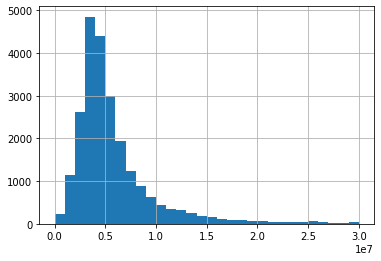

In [24]:
# изучение цены продожи квартиры
df['last_price'].value_counts()
display(df['last_price'])
df['last_price'].hist(bins=30 ,range=(0, 30000000))

<AxesSubplot:>

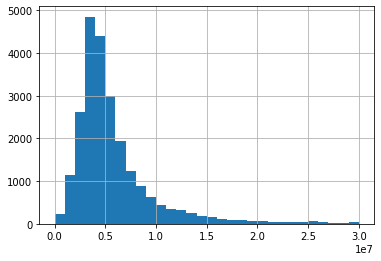

In [25]:
#код ревьюера
df['last_price'].hist(bins=30, range=(0, 30000000))

<AxesSubplot:>

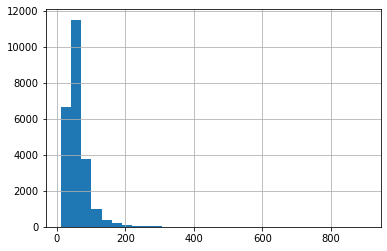

In [26]:
# изучение площади квартиры
df['total_area'].value_counts()
df['total_area'].hist(bins=30)

<AxesSubplot:>

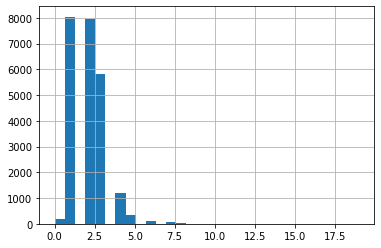

In [27]:
# изучение кол-ва комнат  
df['rooms'].value_counts()
df['rooms'].hist(bins=30)

<AxesSubplot:>

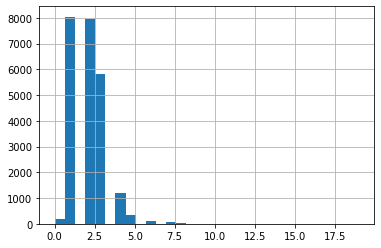

In [28]:
# изучение высоты потолков 
df['ceiling_height'].value_counts()
df['rooms'].hist(bins=30)

In [29]:
# изучение времени продожи квартиры
df['days_exposition'].value_counts()

0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

<AxesSubplot:>

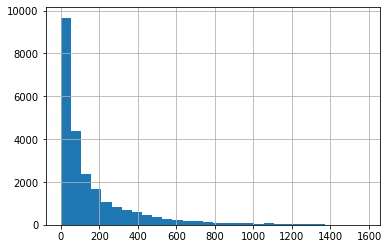

In [30]:
df['days_exposition'].hist(bins=30)

In [31]:
# время продожи среднее 
df['days_exposition'].mean()


156.60884425503187

In [32]:
#  время продожи медиана
df['days_exposition'].median()

74.0

In [33]:
df[['days_exposition']].describe()

,days_exposition
count,23699.000000
mean,156.608844
std,213.546873
min,0.000000
25%,22.000000
50%,74.000000
75%,199.000000
max,1580.000000


<div class="alert alert-info">коммент 2
    Анализ времени продажи квартиры:
    
    1.в среднем продажа занимает около 5 мес
    
    2 наибольшее  число квартир продается в диапазоне 200 дней ( 6.5 мес)
    
    3.быстрые продажи чуть более двух месяцев( по данным медианы)
    
    4. аномально долгие продажи, более четырех с половиной лет.
    Это  времени, сопоставимо с длительностью исследования и позволяет предположить , что объявления забывали снять с публикации. 
    5. аномально быстрые продажи по  0 дней (кол-во-3181 , это пропущенные значения которые мы заменяли на 0)
    
    
    
    
    
    
    
    

## Выявление , анализ и удаление аномальных значений

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

,last_price
count,2.369900e+04
mean,6.541549e+06
std,1.088701e+07
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.800000e+06
max,7.630000e+08


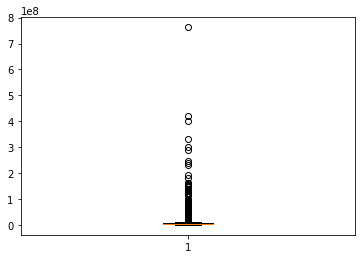

In [34]:
 # изучение цены  продажи квартиры
df['last_price'].value_counts()
display(df['last_price'])
plt.boxplot(x=df['last_price'])
df[['last_price']].describe() 

,last_price
count,2.369000e+04
mean,6.408173e+06
std,7.897411e+06
min,1.219000e+04
25%,3.400000e+06
50%,4.650000e+06
75%,6.790000e+06
max,1.908700e+08


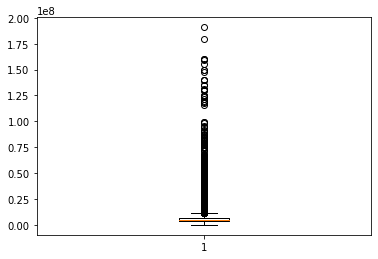

In [35]:
 # удаление аномалий и проверка 

df = df.loc[df['last_price'] <200000000]
plt.boxplot(x=df['last_price'])
df[['last_price']].describe() 


0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23690, dtype: int64

,rooms
count,23690.000000
mean,2.069143
std,1.074630
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


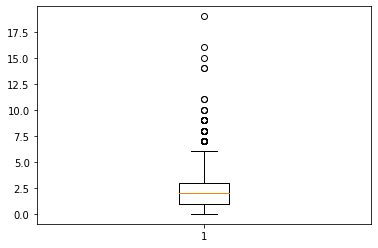

In [36]:
# изучение комна
df['rooms'].value_counts()
display(df['rooms'])

plt.boxplot(x=df['rooms'])
df[['rooms']].describe() 

,rooms
count,23488.000000
mean,2.083617
std,1.043520
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


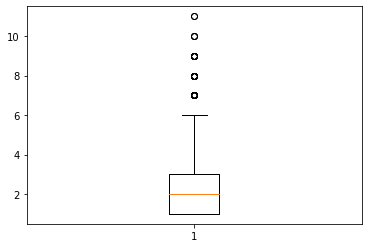

In [37]:
# удаление аномалий и проверка 
df = df.loc[df['rooms']!=0]
df = df.loc[df['rooms'] <12] 
plt.boxplot(x=df['rooms'])
df[['rooms']].describe() 



0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: sq_m_price, Length: 23488, dtype: int64

,sq_m_price
count,23488.000000
mean,98998.470836
std,46013.913115
min,111.000000
25%,76470.000000
50%,94878.000000
75%,114037.500000
max,995983.000000


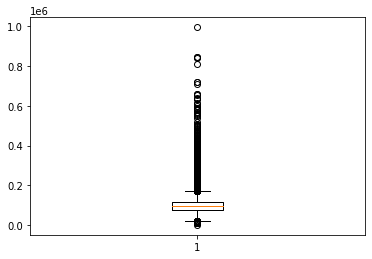

In [38]:
# изучение цены квадратного метра квартиры
df['sq_m_price'].value_counts()
display(df['sq_m_price'])
plt.boxplot(x=df['sq_m_price'])
df[['sq_m_price']].describe()

,sq_m_price
count,23488.000000
mean,98998.470836
std,46013.913115
min,111.000000
25%,76470.000000
50%,94878.000000
75%,114037.500000
max,995983.000000


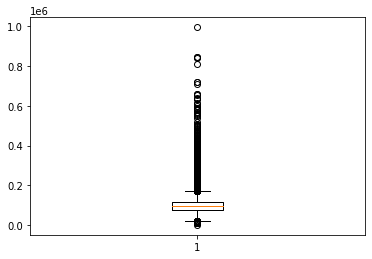

In [39]:
# удаление аномалий и проверка 
df = df.loc[df['sq_m_price']!=0]
df = df.loc[df['sq_m_price'] <1000000]
plt.boxplot(x=df['sq_m_price'])
df[['sq_m_price']].describe() 

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23488, dtype: float64

,total_area
count,23488.000000
mean,60.401029
std,34.285080
min,12.000000
25%,40.172500
50%,52.000000
75%,70.000000
max,631.200000


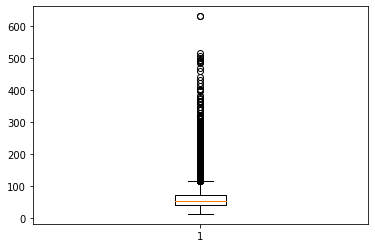

In [40]:
# изучение цены квадратного метра квартиры
df['total_area'].value_counts()
display(df['total_area'])
plt.boxplot(x=df['total_area'])
df[['total_area']].describe()

,total_area
count,23488.000000
mean,60.401029
std,34.285080
min,12.000000
25%,40.172500
50%,52.000000
75%,70.000000
max,631.200000


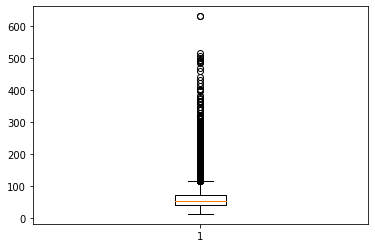

In [41]:
# удаление аномалий и проверка 
df = df.loc[df['total_area']!=0]
df = df.loc[df['total_area'] <400000]
plt.boxplot(x=df['total_area'])
df[['total_area']].describe() 

In [88]:
#код ревьюера
df['total_area'].max()

631.2

In [42]:
df_new_total_area = df.pivot_table(index='total_area', values='last_price', aggfunc=['count','sum','mean','median']) 

display(df_new_total_area)

,count,sum,mean,median
,last_price,last_price,last_price,last_price
total_area,,,,
12.0,1,2400000.0,2400000.0,2400000.0
13.0,3,7050000.0,2350000.0,1850000.0
13.2,1,1686000.0,1686000.0,1686000.0
14.0,1,1190000.0,1190000.0,1190000.0
15.0,2,3450000.0,1725000.0,1725000.0
...,...,...,...,...
500.0,1,150000000.0,150000000.0,150000000.0
507.0,1,84000000.0,84000000.0,84000000.0


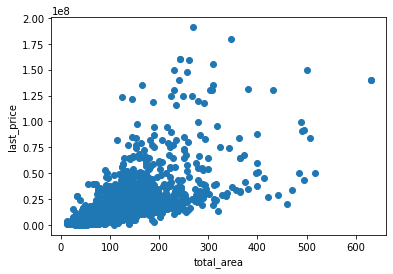

In [43]:
plt.xlabel('total_area')
plt.ylabel('last_price')
plt.scatter(x=df['total_area'], y=df['last_price'])


In [44]:
df_new_floor_category = df.pivot_table(index='floor_category', values='sq_m_price', aggfunc=['count','sum','mean','median']) 

display(df_new_floor_category)

,count,sum,mean,median
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
floor_category,,,,
другой,17271,1783430411,103261.560477,98196
первый,2899,237424072,81898.610555,81218
последний,3318,304421600,91748.523207,87688


In [45]:
df_new_floor_category.columns

MultiIndex([( 'count', 'sq_m_price'),
            (   'sum', 'sq_m_price'),
            (  'mean', 'sq_m_price'),
            ('median', 'sq_m_price')],
           )

<AxesSubplot:title={'center':'Распределение стоимости по категории этажа'}, xlabel='floor_category'>

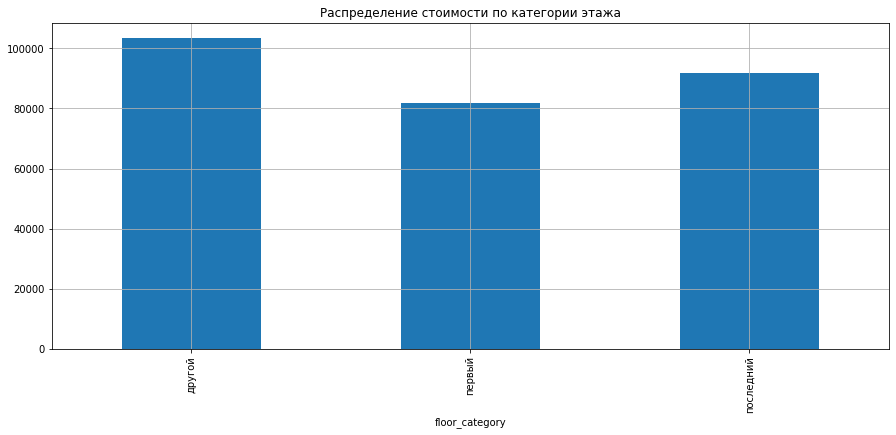

In [46]:
df_new_floor_category['mean', 'sq_m_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение стоимости по категории этажа', 
                                      grid=True)

In [47]:
df_new_rooms = df.pivot_table(index='rooms', values='sq_m_price', aggfunc=['count','sum','mean','max']) 

display(df_new_rooms)

,count,sum,mean,max
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
rooms,,,,
1,8047,811281086,100817.830993,848484
2,7939,756641704,95306.928329,612557
3,5813,563097295,96868.621194,841379
4,1180,130190769,110331.160169,995983
5,325,40319716,124060.664615,658436
6,102,12872519,126201.166667,562770
7,57,7257664,127327.438596,348936
8,12,2215807,184650.583333,652173


In [48]:
df_new_rooms.columns

MultiIndex([('count', 'sq_m_price'),
            (  'sum', 'sq_m_price'),
            ( 'mean', 'sq_m_price'),
            (  'max', 'sq_m_price')],
           )

<AxesSubplot:title={'center':'Распределение цены от числа комнат'}, xlabel='rooms'>

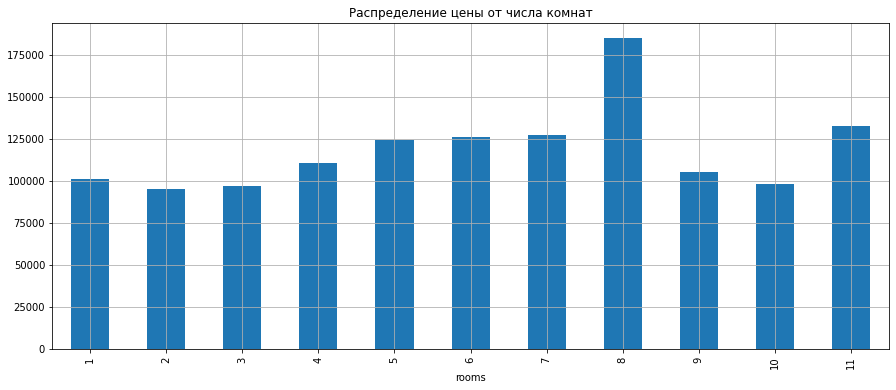

In [49]:
df_new_rooms['mean', 'sq_m_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от числа комнат', 
                                      grid=True)

In [50]:
#зависимость стоимости цены квадратного метра от удаленности от ценра 
df_new_cityCenters_nearest = df.pivot_table(index='cityCenters_nearest', values='sq_m_price',aggfunc='mean')
display(df_new_cityCenters_nearest)

,sq_m_price
cityCenters_nearest,
0.181,195591.0
0.208,172619.0
0.215,109900.0
0.287,88796.0
0.291,101321.0
...,...
64.857,67843.0
65.105,75862.0
65.764,67796.0


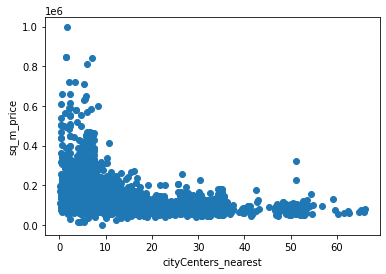

In [51]:
plt.xlabel('cityCenters_nearest')
plt.ylabel('sq_m_price')
plt.scatter(x=df['cityCenters_nearest'], y=df['sq_m_price'])

<div class="alert alert-info">  Стоимость квадратного метра  в радиусе примерно 7-10 км от центра максимальная 

## Зависимость цены от времени размещения объявления

In [52]:
# таблица зависимости от дня недели
df_new_week = df.pivot_table(index='first_day_exposition_weekday', values='last_price',aggfunc='mean')
display(df_new_week)

,last_price
first_day_exposition_weekday,
0,6.379477e+06
1,6.356366e+06
2,6.410824e+06
3,6.704336e+06
4,6.414309e+06
5,6.259450e+06
6,6.269467e+06


<AxesSubplot:title={'center':'Распределение цены от дня недели размещения объявления'}, xlabel='first_day_exposition_weekday'>

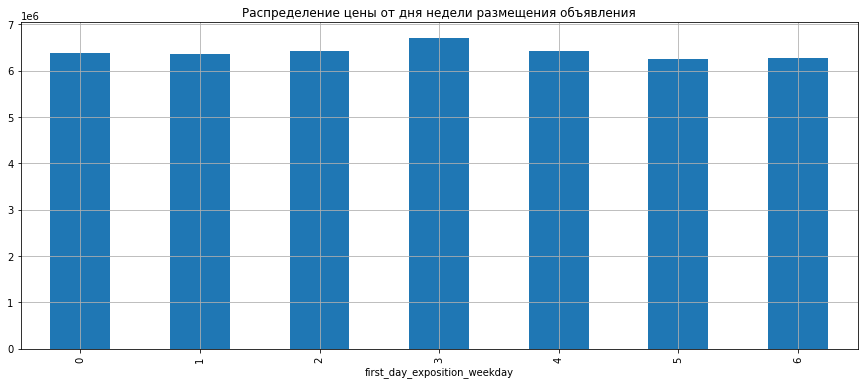

In [53]:
df_new_week[ 'last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от дня недели размещения объявления', 
                                      grid=True)

In [54]:
# таблица зависимости от месяца
df_new_month = df.pivot_table(index='first_day_exposition_month', values='last_price',aggfunc='mean')
display(df_new_month)

,last_price
first_day_exposition_month,
1,6.702762e+06
2,6.319714e+06
3,6.256044e+06
4,6.420011e+06
5,6.444628e+06
6,6.303524e+06
7,6.638658e+06
8,6.393823e+06
9,6.489484e+06


<AxesSubplot:title={'center':'Распределение цены от месяца размещения объявления'}, xlabel='first_day_exposition_month'>

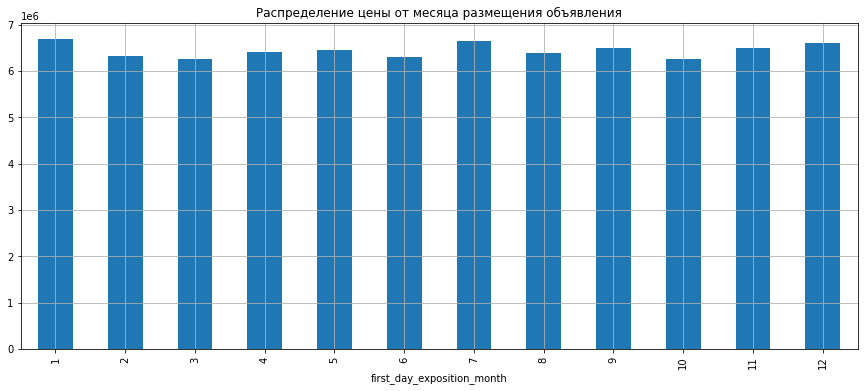

In [55]:
df_new_month['last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от месяца размещения объявления', 
                                      grid=True)

In [56]:
# таблица зависимости от года
df_new_year = df.pivot_table(index='first_day_exposition_year', values='last_price',aggfunc='mean')
display(df_new_year)

,last_price
first_day_exposition_year,
2014,1.208714e+07
2015,8.571655e+06
2016,6.684174e+06
2017,6.359066e+06
2018,5.928549e+06
2019,6.684899e+06


<AxesSubplot:title={'center':'Распределение цены от года размещения'}, xlabel='first_day_exposition_year'>

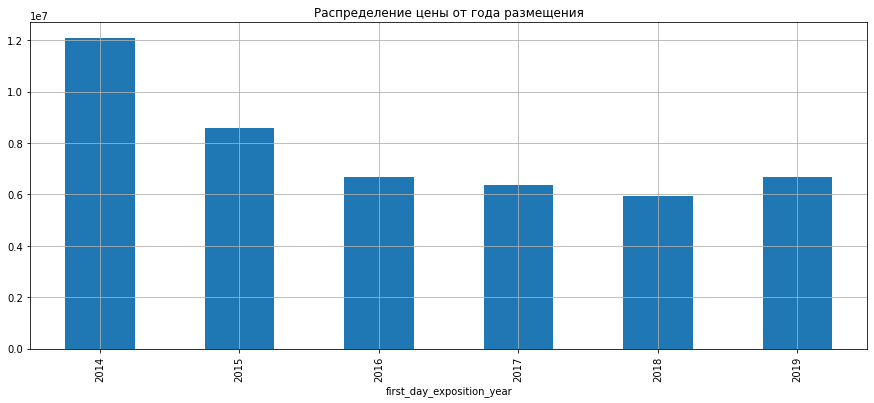

In [57]:
df_new_year[ 'last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от года размещения', 
                                      grid=True)

<div class="alert alert-info"> 
    
   цена в зависимости от времени размещения объявления:
    
    1. самые дешевые цены  выставлят в понедельник и пятницу ( начало и конец недели)
    
    2.самый высокий уровень цен по средам ( середина рабочей  недели)
    
    3.в распределении цен по месяцам: лидирует январь ( начало года).
 Самый низкий уровень цен в июне ( совпадает с началом периода отпусков ).спад октября постепенно возвращается к средним значениям на конец года
    
    4.анализ цены по годам: самый высокий уровень цен в 2014, когда был резкий скачек цены на рынке недвижимости .Затем в 2015 показатель снизился и с 2016 года наблюдается примерно одинаовое значение цены во всем периоде наблюдений до 2019г.
    
На все эти показатели, вообщем , повлиял человеческий фактор(дни, месяцы) и общая ситуация рынка недвижимости(годы) 
    
    
    
    
    
    
    
    

In [58]:
df['locality_name'].value_counts()

Санкт-Петербург                   15597
посёлок Мурино                      495
посёлок Шушары                      436
Всеволожск                          392
Пушкин                              369
                                  ...  
поселок Жилпосёлок                    1
поселок городского типа Рябово        1
деревня Шпаньково                     1
поселок Перово                        1
деревня Хапо-Ое                       1
Name: locality_name, Length: 362, dtype: int64

In [59]:
df_top_10 = df.pivot_table(index='locality_name', values='sq_m_price',aggfunc=['count','mean']).reset_index()
df_top_10= df_top_10.sort_values( by='locality_name',ascending=False)
display(df_top_10.head (10))

,locality_name,count,mean
,,sq_m_price,sq_m_price
361,село Шум,1,33898.000000
360,село Старая Ладога,2,34696.500000
359,село Русско-Высоцкое,9,54833.222222
358,село Рождествено,3,37732.666667
357,село Путилово,2,39921.500000
356,село Паша,2,28120.500000
355,село Павлово,7,61892.428571
354,село Никольское,1,36697.000000
353,село Копорье,5,46051.000000


In [60]:
#код ревьюера

df_top = df.groupby('locality_name').agg({'ceiling_height' : 'count', 'sq_m_price' : 'mean'})

df_top_10 = df_top.sort_values(by='ceiling_height',ascending=False).head(10).reset_index()

df_top_10.columns = ['locality_name', 'count', 'mean_sq_m_price']

df_top_10

,locality_name,count,mean_sq_m_price
0,Санкт-Петербург,15597,114280.317818
1,посёлок Мурино,495,85031.317172
2,посёлок Шушары,436,78405.277523
3,Всеволожск,392,68617.548469
4,Пушкин,369,103125.373984
5,Колпино,338,75424.150888
6,посёлок Парголово,323,90289.352941
7,Гатчина,307,68745.693811
8,деревня Кудрово,283,92296.749117
9,Выборг,237,58141.489451


In [61]:
# одной строкой: группировка таблицы по столбцу 'locality_name', 
# подсчёт числа значений в этой группировке методом count(), 
df_top_10 = df.groupby('locality_name')['locality_name'].count()
# сортировка получившегося Series в порядке убывания
df_top_10= df_top_10.sort_values(ascending=False)
display(df_top_10.head (10))

locality_name
Санкт-Петербург      15597
посёлок Мурино         495
посёлок Шушары         436
Всеволожск             392
Пушкин                 369
Колпино                338
посёлок Парголово      323
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: int64

In [63]:
city_center_area=10
df_centr_spb=df.query('locality_name in["Санкт-Петербург"] and cityCenters_nearest<@city_center_area')
display(df_centr_spb)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_area,kitchen_area_total
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,3.0,234.0,424,408176,4,7,2015,другой,0.0,0.000000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,1.0,48.0,121,100000,1,6,2018,другой,2.0,41.000000
21,13,3200000.0,31.60,2018-03-14T00:00:00,1,2.65,5.0,13,2,False,...,0.0,NaN,310,101265,2,3,2018,другой,41.139241,18.037975
24,8,6500000.0,97.20,2015-10-31T00:00:00,2,2.65,3.0,8,1,False,...,3.0,124.0,265,66872,5,10,2015,первый,8.230453,20.164609
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,2.65,5.0,6,4,False,...,1.0,779.0,644,104026,0,6,2017,другой,4.026846,11.409396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05T00:00:00,3,2.65,8.0,10,3,False,...,2.0,303.0,0,106250,1,3,2019,другой,17.857143,15.178571
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,13,2,False,...,2.0,660.0,80,122093,4,5,2018,другой,30.232558,13.953488
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,3,2,False,...,0.0,NaN,15,105769,3,7,2018,другой,5.769231,11.538462
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,11,7,False,...,1.0,806.0,519,129903,3,10,2016,другой,15.089163,14.540466


In [64]:
# колонка cityCenters_nearest_km 
df_centr_spb['cityCenters_km']=df['cityCenters_nearest']
display(df_centr_spb['cityCenters_km'])

/tmp/ipykernel_121/1149157246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centr_spb['cityCenters_km']=df['cityCenters_nearest']


3        6.800
4        8.098
21       9.722
24       2.336
35       3.502
         ...  
23674    9.217
23681    7.262
23690    6.263
23691    4.489
23694    4.232
Name: cityCenters_km, Length: 5031, dtype: float64

In [65]:
display(df_centr_spb)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_area,kitchen_area_total,cityCenters_km
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,234.0,424,408176,4,7,2015,другой,0.0,0.000000,6.800
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,48.0,121,100000,1,6,2018,другой,2.0,41.000000,8.098
21,13,3200000.0,31.60,2018-03-14T00:00:00,1,2.65,5.0,13,2,False,...,NaN,310,101265,2,3,2018,другой,41.139241,18.037975,9.722
24,8,6500000.0,97.20,2015-10-31T00:00:00,2,2.65,3.0,8,1,False,...,124.0,265,66872,5,10,2015,первый,8.230453,20.164609,2.336
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,2.65,5.0,6,4,False,...,779.0,644,104026,0,6,2017,другой,4.026846,11.409396,3.502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23674,10,5950000.0,56.00,2019-03-05T00:00:00,3,2.65,8.0,10,3,False,...,303.0,0,106250,1,3,2019,другой,17.857143,15.178571,9.217
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,13,2,False,...,660.0,80,122093,4,5,2018,другой,30.232558,13.953488,7.262
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,3,2,False,...,NaN,15,105769,3,7,2018,другой,5.769231,11.538462,6.263
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,11,7,False,...,806.0,519,129903,3,10,2016,другой,15.089163,14.540466,4.489


In [66]:
#перевод  вещественного типа данных в колонке cityCenters_nearest_km  
df_centr_spb['cityCenters_km']=df_centr_spb['cityCenters_km'].astype('int')

display(df_centr_spb['cityCenters_km'])

/tmp/ipykernel_121/1579582933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_centr_spb['cityCenters_km']=df_centr_spb['cityCenters_km'].astype('int')


3        6
4        8
21       9
24       2
35       3
        ..
23674    9
23681    7
23690    6
23691    4
23694    4
Name: cityCenters_km, Length: 5031, dtype: int64

<div class="alert alert-info">перевод в целочисленный 

In [67]:
df_centr_spb['cityCenters_km'].value_counts()

4    903
5    762
9    686
8    665
3    522
6    465
7    402
2    303
1    237
0     86
Name: cityCenters_km, dtype: int64

In [68]:
df_centr_spb[['cityCenters_km']].describe()

,cityCenters_km
count,5031.000000
mean,5.352614
std,2.444959
min,0.000000
25%,4.000000
50%,5.000000
75%,8.000000
max,9.000000


In [69]:
# сводная таблица центра и анализ средней стоимости по километрам удаленности 
df_new_center_spb = df_centr_spb.pivot_table(index='cityCenters_km', values='last_price',aggfunc='mean').reset_index()
display(df_new_center_spb )

,cityCenters_km,last_price
0,0,2.344232e+07
1,1,1.644205e+07
2,2,1.494019e+07
3,3,1.200622e+07
4,4,1.357929e+07
5,5,1.439679e+07
6,6,1.382469e+07
7,7,1.182523e+07
8,8,8.477131e+06
9,9,6.445347e+06


<div class="alert alert-info">Центральная зона в радиусе до 10 км, цена снижается по мере удаленности 

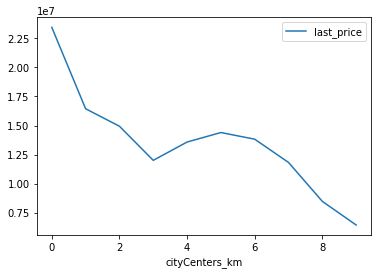

In [70]:
df_new_center_spb.plot(x="cityCenters_km", y="last_price")
    
plt.show()

## Анализ параметров квартир в центре

In [71]:
city_center_new=8
df_centr_spb_analis=df_centr_spb.query('locality_name in["Санкт-Петербург"] and cityCenters_km <=@city_center_new')
display(df_centr_spb_analis)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_m_price,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,living_total_area,kitchen_area_total,cityCenters_km
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0,9,False,...,234.0,424,408176,4,7,2015,другой,0.0,0.000000,6
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,2,13,False,...,48.0,121,100000,1,6,2018,другой,2.0,41.000000,8
24,8,6500000.0,97.20,2015-10-31T00:00:00,2,2.65,3.0,8,1,False,...,124.0,265,66872,5,10,2015,первый,8.230453,20.164609,2
35,6,15500000.0,149.00,2017-06-26T00:00:00,5,2.65,5.0,6,4,False,...,779.0,644,104026,0,6,2017,другой,4.026846,11.409396,3
51,7,45000000.0,161.00,2017-10-17T00:00:00,3,3.20,8.0,7,4,False,...,99.0,541,279503,1,10,2017,другой,4.347826,31.055901,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.0,47.00,2016-05-20T00:00:00,1,2.65,6.0,11,1,False,...,519.0,131,90425,4,5,2016,первый,23.404255,31.063830,4
23681,13,5250000.0,43.00,2018-05-11T00:00:00,2,2.50,5.0,13,2,False,...,660.0,80,122093,4,5,2018,другой,30.232558,13.953488,7
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.65,5.0,3,2,False,...,NaN,15,105769,3,7,2018,другой,5.769231,11.538462,6
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,11,7,False,...,806.0,519,129903,3,10,2016,другой,15.089163,14.540466,4


In [72]:
#сводная таблица первичного анализа площадь,число комнат ,высота потолков
df_centr_spb_analis_first = df_centr_spb_analis.pivot_table(index=[ "total_area", "rooms","ceiling_height"],columns=["locality_name"], values="last_price",aggfunc=['mean']).reset_index()
display(df_centr_spb_analis_first )

,total_area,rooms,ceiling_height,mean
locality_name,,,,Санкт-Петербург
0,12.0,1,2.55,2400000.0
1,13.0,1,2.65,3800000.0
2,13.0,1,3.40,1850000.0
3,13.2,1,2.65,1686000.0
4,17.0,1,2.75,1900000.0
...,...,...,...,...
3355,500.0,4,3.20,150000000.0
3356,507.0,5,4.45,84000000.0
3357,517.0,7,2.65,50000000.0


##   Анализ факторов влияющих на стоимость квартир  в центре 

In [73]:
# сводная таблица зависимости стоимости от числа комнат 
df_rooms_spb = df_centr_spb_analis.pivot_table(index='rooms', values='sq_m_price', aggfunc=['count','sum','mean','max']) 

display(df_rooms_spb)

,count,sum,mean,max
,sq_m_price,sq_m_price,sq_m_price,sq_m_price
rooms,,,,
1,731,106407941,145564.898769,848484
2,1337,181406531,135681.773373,612557
3,1353,187153230,138324.634146,841379
4,547,76616279,140066.323583,995983
5,224,31583488,140997.714286,658436
6,83,11281635,135923.313253,562770
7,52,6637109,127636.711538,348936
8,11,2109620,191783.636364,652173


<AxesSubplot:title={'center':'Распределение цены от числа комнат'}, xlabel='rooms'>

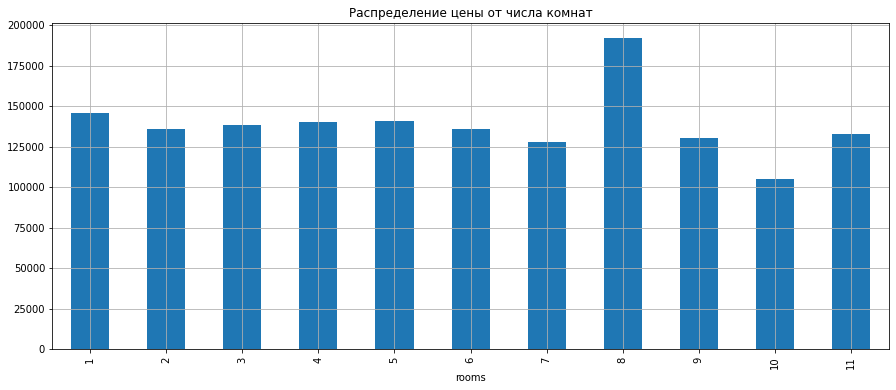

In [74]:
df_rooms_spb['mean', 'sq_m_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от числа комнат', 
                                      grid=True)

<div class="alert alert-info"> наблюдается резкий всплеск показателя, что может быть обусловлено особенностями самого помещения отличающегося от типовой застройки. 


In [75]:
# сводная таблица зависимости стоимости от категории этажа
df_floor_category_spb =  df_centr_spb_analis.pivot_table(index='floor_category', values='last_price', aggfunc=['count','mean','median']) 

display(df_floor_category_spb)

,count,mean,median
,last_price,last_price,last_price
floor_category,,,
другой,3159,1.334605e+07,9000000.0
первый,460,8.809341e+06,6312500.0
последний,726,1.452675e+07,8945000.0


<AxesSubplot:title={'center':'Распределение стоимости по категории этажа'}, xlabel='floor_category'>

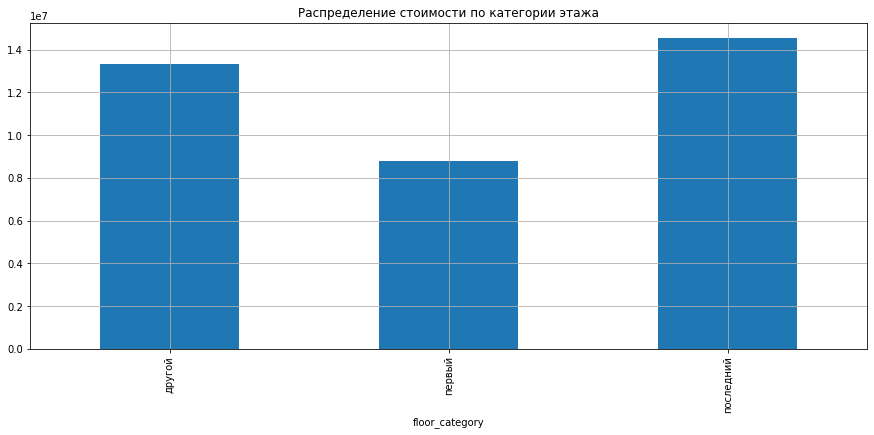

In [76]:
df_floor_category_spb['mean', 'last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение стоимости по категории этажа', 
                                      grid=True)

In [77]:
# сводная таблица зависимости стоимости от категории этажа
df_floor_category_spb =  df_centr_spb_analis.pivot_table(index='floor_category', values='sq_m_price', aggfunc=['count','mean','median']) 

display(df_floor_category_spb)

,count,mean,median
,sq_m_price,sq_m_price,sq_m_price
floor_category,,,
другой,3159,142679.642608,125796.0
первый,460,120312.806522,106346.0
последний,726,134977.236915,115407.5


<AxesSubplot:title={'center':'Распределение стоимости по категории этажа'}, xlabel='floor_category'>

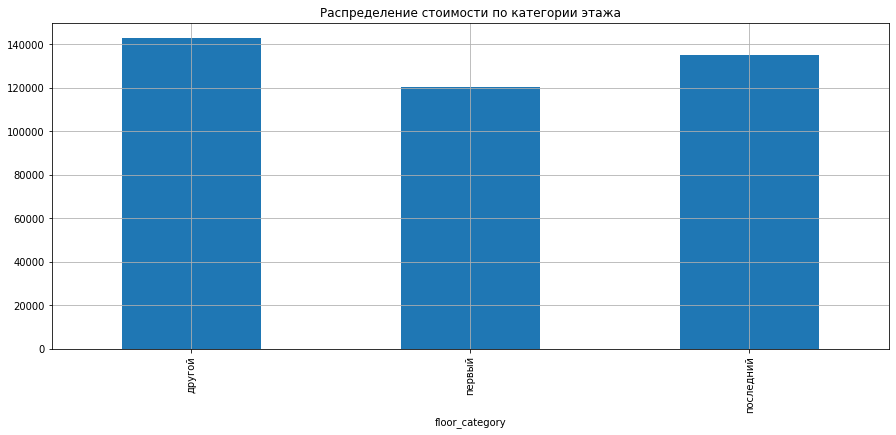

In [78]:
df_floor_category_spb['mean', 'sq_m_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение стоимости по категории этажа', 
                                      grid=True)

In [79]:
#зависимость стоимости цены квадратного метра от удаленности от ценра 
df_centers_nearest_spb = df_centr_spb_analis.pivot_table(index='cityCenters_km', values='sq_m_price',aggfunc='mean').reset_index()
display(df_centers_nearest_spb)

,cityCenters_km,sq_m_price
0,0,187323.674419
1,1,154387.582278
2,2,144029.663366
3,3,126145.588123
4,4,137458.156146
5,5,145601.194226
6,6,150597.838710
7,7,140827.601990
8,8,120541.596992


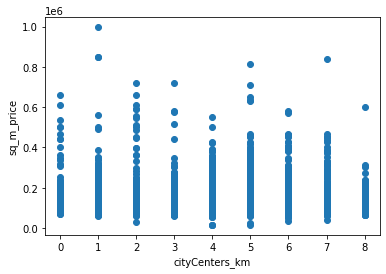

In [80]:
plt.xlabel('cityCenters_km')
plt.ylabel('sq_m_price')
plt.scatter(x= df_centr_spb_analis['cityCenters_km'], y= df_centr_spb_analis['sq_m_price'])

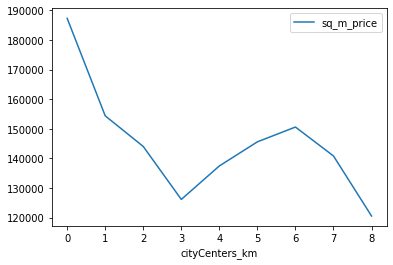

In [81]:
df_centers_nearest_spb.plot(x="cityCenters_km", y="sq_m_price")
    
plt.show()

## Зависимость цены в Петербурге от даты размещения объявления

In [82]:
# таблица зависимости от дня недели
df_week_spb = df_centr_spb_analis.pivot_table(index='first_day_exposition_weekday', values='last_price',aggfunc='mean')
display(df_week_spb )

,last_price
first_day_exposition_weekday,
0,1.290930e+07
1,1.257264e+07
2,1.260321e+07
3,1.349203e+07
4,1.335258e+07
5,1.296994e+07
6,1.401585e+07


<AxesSubplot:title={'center':'Распределение цены отдня недели размещения объявления'}, xlabel='first_day_exposition_weekday'>

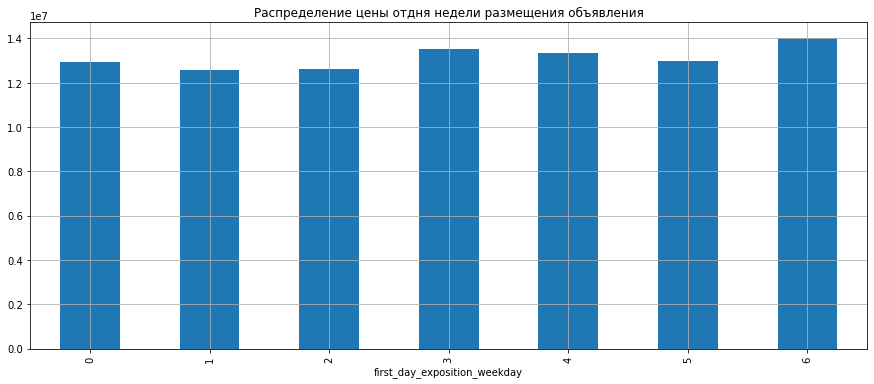

In [83]:
df_week_spb [ 'last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены отдня недели размещения объявления', 
                                      grid=True)

In [84]:
# таблица зависимости от месяца
df_month_spb =df_centr_spb_analis.pivot_table(index='first_day_exposition_month', values='last_price',aggfunc='mean')
display(df_month_spb)

,last_price
first_day_exposition_month,
1,1.446969e+07
2,1.299075e+07
3,1.270809e+07
4,1.280269e+07
5,1.277025e+07
6,1.334169e+07
7,1.379807e+07
8,1.290644e+07
9,1.257717e+07


<AxesSubplot:title={'center':'Распределение цены от месяца размещения объявления'}, xlabel='first_day_exposition_month'>

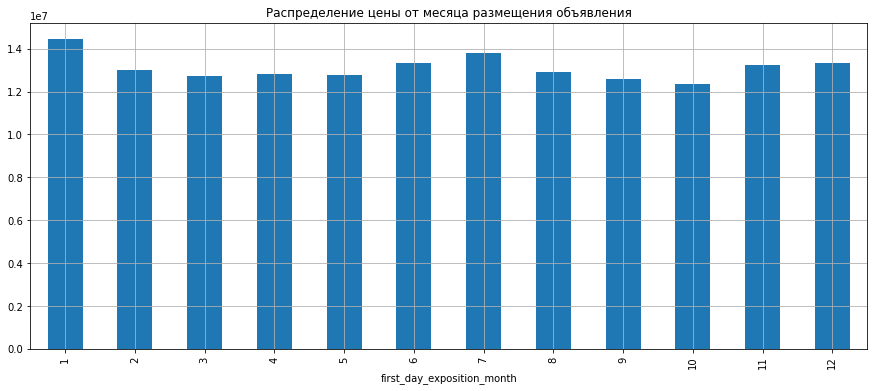

In [85]:
df_month_spb['last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от месяца размещения объявления', 
                                      grid=True)

In [86]:
# таблица зависимости от года
df_year_spb = df_centr_spb_analis.pivot_table(index='first_day_exposition_year', values='last_price',aggfunc='mean')
display(df_year_spb)

,last_price
first_day_exposition_year,
2014,2.223947e+07
2015,1.609422e+07
2016,1.402196e+07
2017,1.287909e+07
2018,1.163871e+07
2019,1.339259e+07


<AxesSubplot:title={'center':'Распределение цены от года размещения'}, xlabel='first_day_exposition_year'>

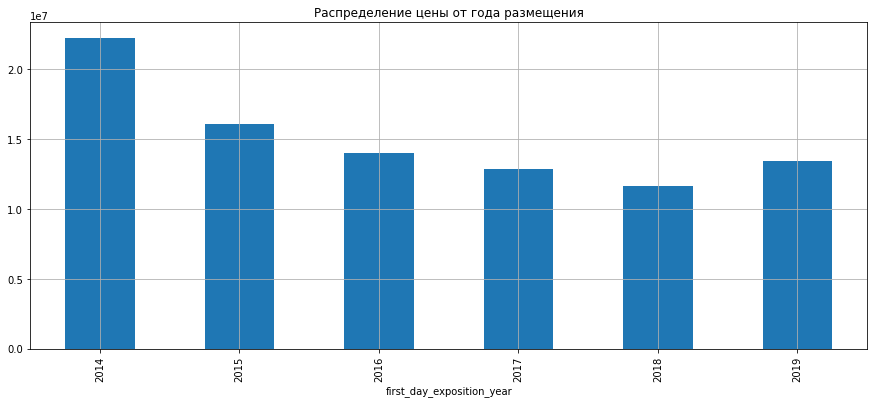

In [87]:
df_year_spb[ 'last_price'].plot(kind='bar', 
                                      figsize=(15, 6), 
                                      title='Распределение цены от года размещения', 
                                      grid=True)

## Общий вывод 

Проведен анализ архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за 2014-2019гг,анализировались следующие    параметры цена квадратного метра и общая стоимость квартиры,время публикации объявления,
этаж квартиры, общая площадь,жилая площадь, локация квартир.
Отдельный анализ  проведен в сегменте квартир в центре  Санкт- Петербурга по аналогичным параметрам.

Выводы:

1.В среднем продажа квартиры занимает около 5 мес.,наибольшее  число квартир продается в диапазоне 200 дней ( 6.5 мес)

2.прослеживается зависимость стоимости квартиры  от общей площади

3.самая низкая стоимость квадратных метров на первом этаже(92561.0 в среднем).Затем последние этажи .Самая высокая стоимость кв.м. у квартир категории "другой"

4.стоимость квадратного метра  в радиусе до 10 км от центра максимальная(в общей выборке)


 Также в исследовании выявлена зависимость цены квартиры  от времени размещения объявления:
 

1.самые низкие цены  выставлят в понедельник и пятницу ( начало и конец недели)

2.самый высокий уровень цен по средам ( середина рабочей  недели)

3.в распределении цен по месяцам: лидирует январь ( начало года).
Самый низкий уровень цен в июне ( совпадает с началом периода отпусков )
Спад октября постепенно возвращается к средним значениям на конец года

4.анализ цены по годам: 
Самый высокий уровень цен в 2014, когда был резкий скачек цены на рынке недвижимости .Затем в 2015 показатель снизился и с 2016 года наблюдается примерно одинаовое значение цены во всем периоде наблюдений до 2019г.
На все эти показатели, вообщем , повлиял человеческий фактор(дни, месяцы) и общая ситуация рынка недвижимости(годы) 


   Анализ факторов влияющих на стоимость квартир  в центре  Санкт-Петербурга выявил, что самые дорогие квартиры в центральной зоне (от 0 до 8 км )
   
  Если анализировать общую стоимость квартиры  то  параметры будут несколько отличатся от общей выборки:
 - есть сегмент очень дорогих квартир на последних этажах в центре( пентхаусы?)) 
 
  - в анализе зависимости от кол-ва комнат  наблюдается резкий всплеск показателя, что может быть обусловлено особенностями        самого помещения, отличающегося от типовой застройки.
   
 - по дате размещения объявления выводы аналогичны выводам по общей базе
 
  
   
   Проведенный анализ и выявленные параметры позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
  






